# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('retail_store_inventory.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


# Data Exploration

In [2]:
# Examine the data's shape
print("Data Shape:", df.shape)

# Inspect data types
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Explore data distributions
print("\nDescriptive Statistics:\n", df.describe())

Data Shape: (73100, 15)

Data Types:
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

Missing Values:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Descriptive Statistics:
        Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count    

In [3]:
df['Category']=df['Category'].astype('category')
print(df.dtypes)

Date                    object
Store ID                object
Product ID              object
Category              category
Region                  object
Inventory Level          int64
Units Sold               int64
Units Ordered            int64
Demand Forecast        float64
Price                  float64
Discount                 int64
Weather Condition       object
Holiday/Promotion        int64
Competitor Pricing     float64
Seasonality             object
dtype: object


In [4]:
# Identify potential issues or patterns
print("\nPotential issues or patterns:")
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate rows:")
print(df.duplicated().sum())


Potential issues or patterns:
Missing values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Duplicate rows:
0


In [5]:
#identify numerical fields
print("Numerical fields are:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

#identify categorical fields
print("\nCategorical fields are:")
print(df.select_dtypes(include=['object', 'category']).columns.tolist())

Numerical fields are:
['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']

Categorical fields are:
['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


In [6]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
display(df)

# Investigate the correlation between variables
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation matrix between numerical features:")
display(correlation_matrix)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring



Correlation matrix between numerical features:


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
Units Sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
Units Ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
Demand Forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
Price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
Discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
Holiday/Promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
Competitor Pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


#### ```Negative values``` in a correlation matrix indicate an inverse relationship between two variables. This means that as one variable increases, the other tends to decrease.

1. ```Discount' vs. 'Price'```: There's a strong negative correlation between 'Discount' and 'Price' (-0.980163). This is expected because higher discounts usually mean lower prices.
2. ```Units Sold' vs. 'Price' and 'Discount'```: 'Units Sold' has a negative correlation with 'Price' (-0.538957) and a positive correlation with 'Discount' (0.524698). This is also reasonable as higher prices generally lead to lower sales, while discounts can boost sales.
3. ```'Inventory Level' vs. 'Units Sold'```: The negative correlation between 'Inventory Level' and 'Units Sold' (-0.216577) might be due to the fact that as more units are sold, the inventory level decreases.

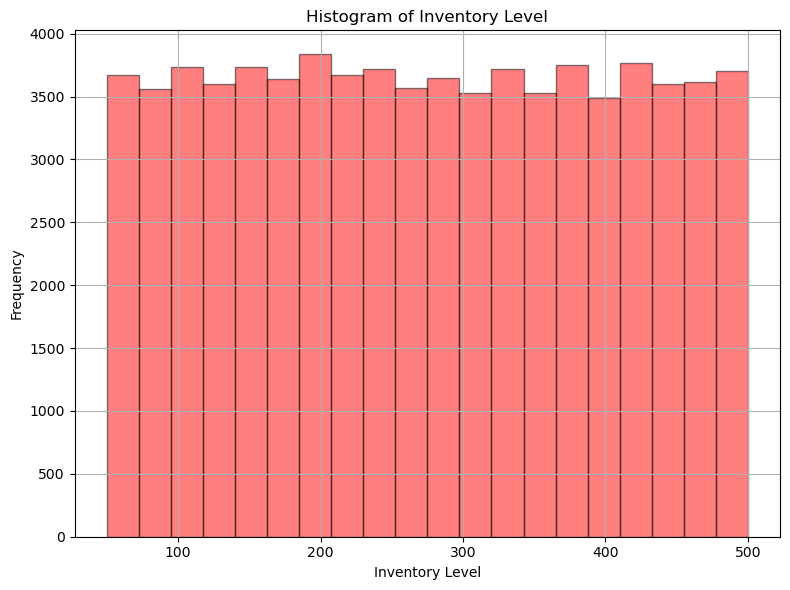

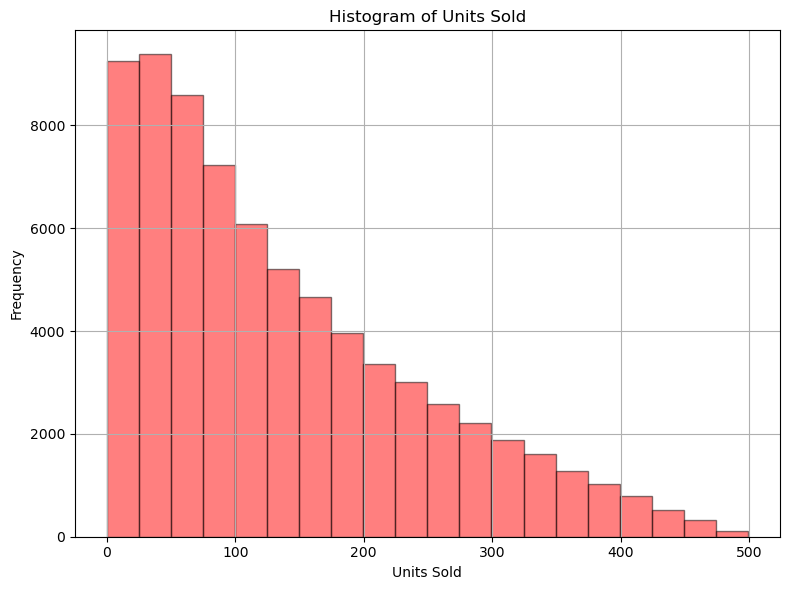

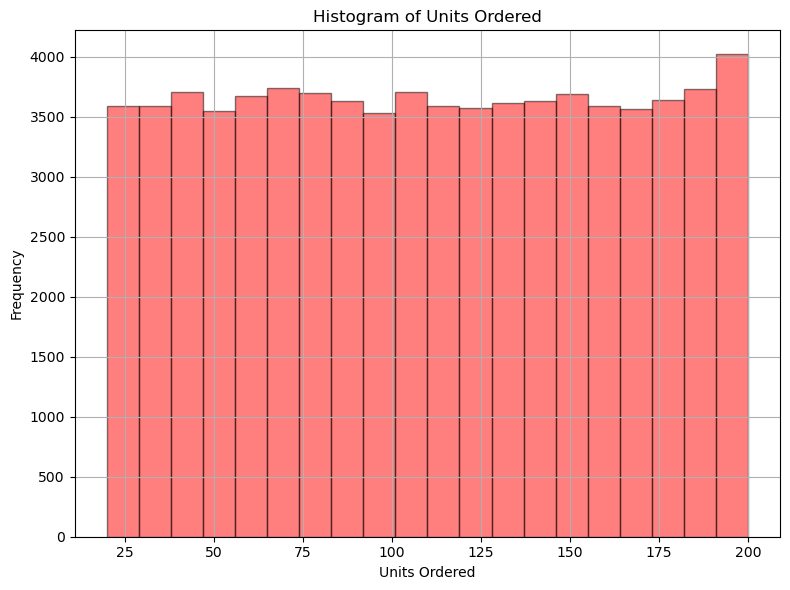

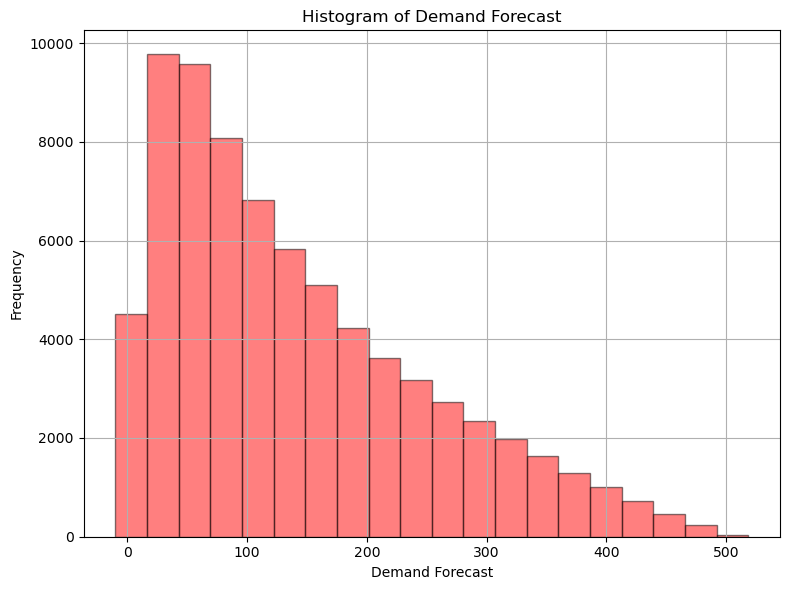

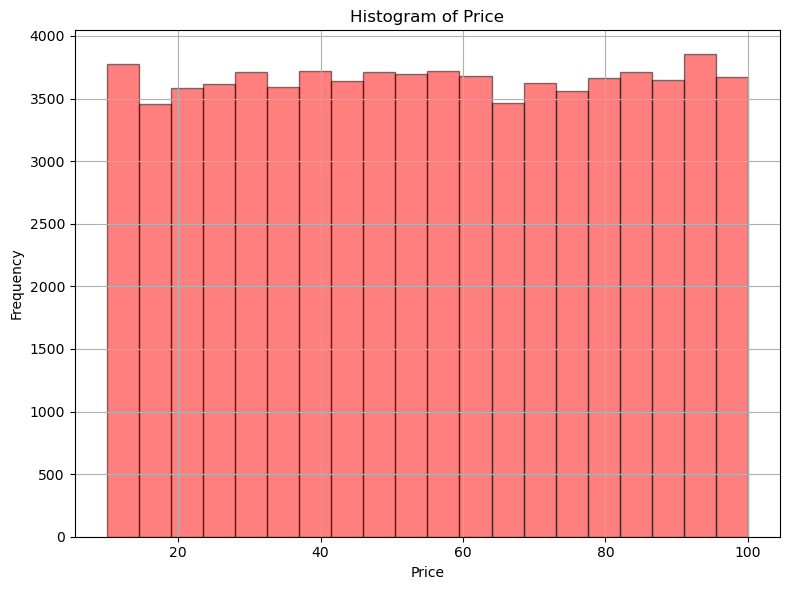

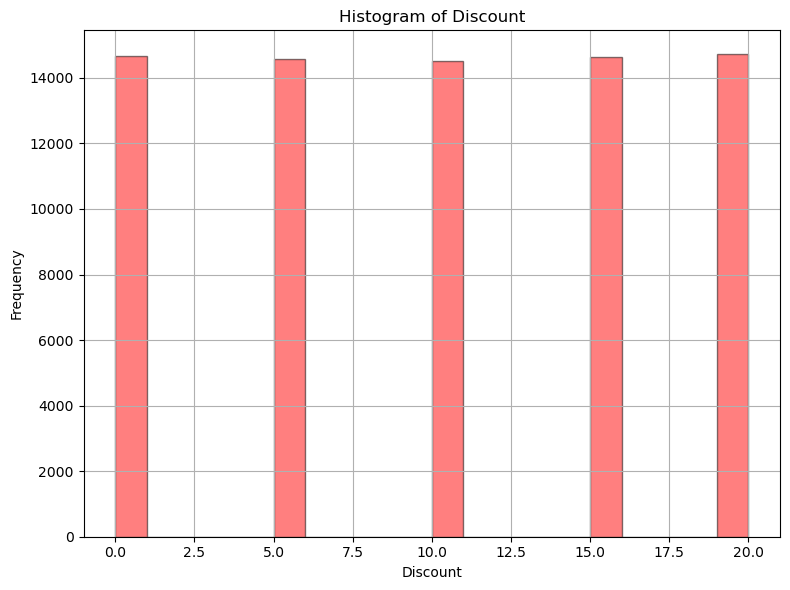

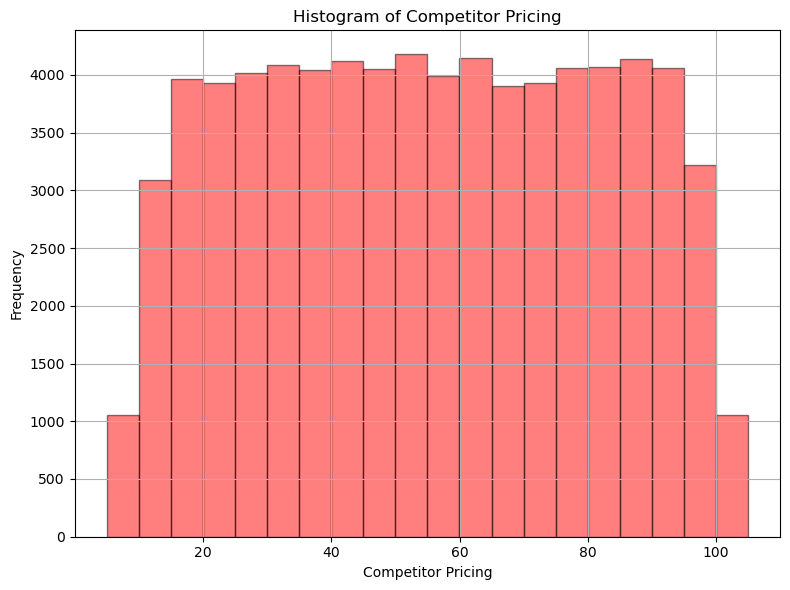

In [7]:
# Create histograms for numerical features
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, ec='k', alpha=0.5, fc='r')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

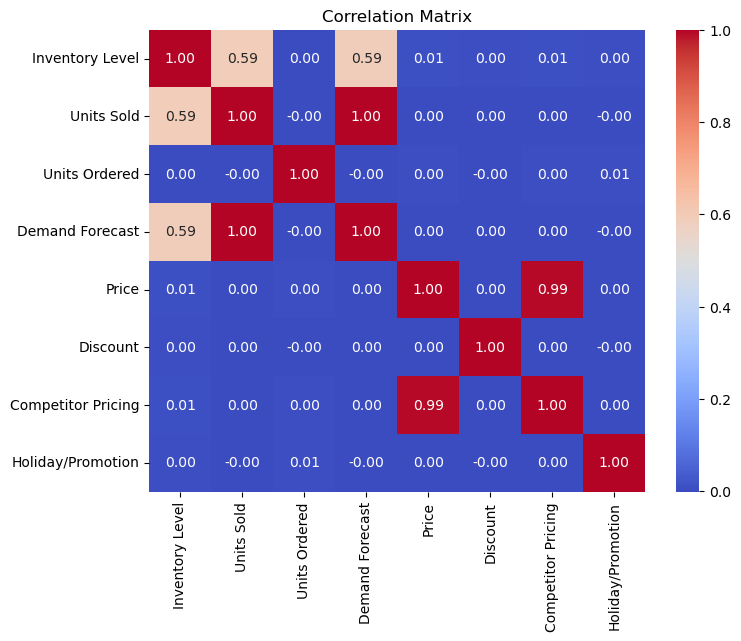

In [8]:
# Correlation Analysis
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Analyze unique values for categorical features
categorical_features = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
for features in categorical_features:
    print(f"\nUnique values for {features}:\n{df[features].unique()}")
    print(f"Number of unique values for {features}: {df[features].nunique()}")


Unique values for Store ID:
['S001' 'S002' 'S003' 'S004' 'S005']
Number of unique values for Store ID: 5

Unique values for Product ID:
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']
Number of unique values for Product ID: 20

Unique values for Category:
['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing']
Categories (5, object): ['Clothing', 'Electronics', 'Furniture', 'Groceries', 'Toys']
Number of unique values for Category: 5

Unique values for Region:
['North' 'South' 'West' 'East']
Number of unique values for Region: 4

Unique values for Weather Condition:
['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Number of unique values for Weather Condition: 4

Unique values for Seasonality:
['Autumn' 'Summer' 'Winter' 'Spring']
Number of unique values for Seasonality: 4


In [10]:
# Identify and handle outliers in 'Units Sold' and 'Inventory Level' using IQR method
for feature in ['Units Sold', 'Inventory Level']:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Define a function to identify outliers using IQR
def identify_outliers_iqr(data):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers


numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
for feature in numerical_features:
  outliers = identify_outliers_iqr(df[feature])
  print(f"Outliers for {feature}: {outliers}")

Outliers for Inventory Level: []
Outliers for Units Sold: [429, 429, 428, 428, 430, 434, 428, 428, 431, 433, 429, 431, 431, 428, 434, 430, 426, 427, 426, 434, 427, 431, 434, 433, 432, 429, 434, 433, 427, 426, 434, 432, 426, 430, 427, 433, 432, 433, 428, 429, 430, 428, 430, 429, 428, 430, 429, 426, 433, 427, 431, 431, 430, 428, 432, 430, 426, 426, 434, 433, 433, 428, 431, 430, 426, 427, 429, 427, 427, 427, 432, 429, 432, 431, 430, 427, 433, 433, 428, 429, 433, 428, 433, 428, 428, 432, 428, 428, 430, 433, 433, 427, 431, 432, 427, 434, 427, 430, 431, 428, 433, 426, 429, 427, 426, 434, 426, 430, 432, 429, 434, 431, 428, 432, 427, 428, 434, 427, 433, 428, 432, 431, 429, 433, 426, 427, 431, 434, 433, 434, 431, 433, 431, 430, 427, 428, 429, 430, 429, 428, 429, 427, 434, 431, 429, 428, 432, 428, 430, 434, 426, 428, 428, 426, 434, 429, 427, 432, 427, 428, 433, 427, 426, 429, 433, 432, 433, 428, 433, 426, 430, 432, 434, 430, 428, 427, 426, 431, 434, 426, 431, 430, 434, 433, 426, 432, 431, 432, 4

In [12]:
#Handling outliers
from scipy.stats.mstats import winsorize
df.loc[:, 'Demand Forecast'] = winsorize(df['Demand Forecast'], limits=[0.05, 0.05])

# Data Wrangling

In [13]:
# Calculate Daily Sales Rate
daily_sales = df.groupby(['Product ID', 'Store ID', 'Date'])['Units Sold'].sum().reset_index()
daily_sales_rate = daily_sales.groupby(['Product ID', 'Store ID'])['Units Sold'].mean().reset_index()
daily_sales_rate = daily_sales_rate.rename(columns={'Units Sold': 'Daily Sales Rate'})
print("Daily Sales Rate:\n")
display(daily_sales_rate)

# Calculate Average Sales per Week
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales = df.groupby(['Product ID', 'Store ID', 'Week'])['Units Sold'].sum().reset_index()
average_weekly_sales = weekly_sales.groupby(['Product ID', 'Store ID'])['Units Sold'].mean().reset_index()
average_weekly_sales = average_weekly_sales.rename(columns={'Units Sold': 'Average Weekly Sales'})
print("\nAverage Weekly Sales:\n")
display(average_weekly_sales)

# Calculate 7-day rolling average sales
daily_sales['Rolling_Avg_Sales'] = daily_sales.groupby('Product ID')['Units Sold'].rolling(window=7, min_periods=1).mean().reset_index(0,drop=True)
print("\nRolling Average Sales\n")
display(daily_sales['Rolling_Avg_Sales'])

Daily Sales Rate:



,Product ID,Store ID,Daily Sales Rate
0,P0001,S001,135.161157
1,P0001,S002,142.005525
2,P0001,S003,126.743448
3,P0001,S004,134.541551
4,P0001,S005,126.997230
...,...,...,...
95,P0020,S001,134.019417
96,P0020,S002,138.865090
97,P0020,S003,134.886897
98,P0020,S004,133.201379



Average Weekly Sales:



,Product ID,Store ID,Average Weekly Sales
0,P0001,S001,1887.057692
1,P0001,S002,1977.153846
2,P0001,S003,1767.096154
3,P0001,S004,1868.057692
4,P0001,S005,1763.307692
...,...,...,...
95,P0020,S001,1858.230769
96,P0020,S002,1920.076923
97,P0020,S003,1880.634615
98,P0020,S004,1857.134615



Rolling Average Sales



0        127.000000
1        104.000000
2         71.000000
3         67.750000
4         83.600000
            ...    
72380    118.857143
72381    124.571429
72382    114.428571
72383    119.285714
72384    115.714286
Name: Rolling_Avg_Sales, Length: 72385, dtype: float64

In [14]:
# Find the last restock date for each product
df['Max_Inventory'] = df.groupby('Product ID')['Inventory Level'].transform('max')
last_restock_date = df[df['Inventory Level'] == df['Max_Inventory']].groupby('Product ID')['Date'].min().reset_index()
last_restock_date = last_restock_date.rename(columns={'Date': 'Last_Restock_Date'})
# Merge last restock date with daily sales
daily_sales = pd.merge(daily_sales, last_restock_date, on='Product ID', how='left')

display(daily_sales.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date
0,P0001,S001,2022-01-01,127,127.00,2022-06-26
1,P0001,S001,2022-01-02,81,104.00,2022-06-26
2,P0001,S001,2022-01-03,5,71.00,2022-06-26
3,P0001,S001,2022-01-04,58,67.75,2022-06-26
4,P0001,S001,2022-01-05,147,83.60,2022-06-26


In [15]:
# Calculate days since last restock
daily_sales['Days_Since_Last_Restock'] = ( daily_sales['Last_Restock_Date'] - daily_sales['Date']).dt.days

# Handle missing values in Days_Since_Last_Restock
daily_sales['Days_Since_Last_Restock'] = daily_sales['Days_Since_Last_Restock'].fillna(0).astype(int)
display(daily_sales.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock
0,P0001,S001,2022-01-01,127,127.00,2022-06-26,176
1,P0001,S001,2022-01-02,81,104.00,2022-06-26,175
2,P0001,S001,2022-01-03,5,71.00,2022-06-26,174
3,P0001,S001,2022-01-04,58,67.75,2022-06-26,173
4,P0001,S001,2022-01-05,147,83.60,2022-06-26,172


In [16]:
daily_sales_rate = pd.merge(daily_sales[['Product ID', 'Store ID']].drop_duplicates(), daily_sales, on=['Product ID', 'Store ID'], how='left')
display(daily_sales_rate.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock
0,P0001,S001,2022-01-01,127,127.00,2022-06-26,176
1,P0001,S001,2022-01-02,81,104.00,2022-06-26,175
2,P0001,S001,2022-01-03,5,71.00,2022-06-26,174
3,P0001,S001,2022-01-04,58,67.75,2022-06-26,173
4,P0001,S001,2022-01-05,147,83.60,2022-06-26,172


In [17]:
# Calculate Days of Inventory Remaining
inventory_remaining = pd.merge(df[['Product ID', 'Store ID', 'Inventory Level']].drop_duplicates(), daily_sales_rate, on=['Product ID', 'Store ID'], how='left')
inventory_remaining['Days of Inventory Remaining'] = inventory_remaining['Inventory Level'] / inventory_remaining['Rolling_Avg_Sales']
inventory_remaining['Days of Inventory Remaining'] = inventory_remaining['Days of Inventory Remaining'].fillna(999999)  # Handle cases where daily sales rate is 0
display(inventory_remaining.head())

,Product ID,Store ID,Inventory Level,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock,Days of Inventory Remaining
0,P0001,S001,231,2022-01-01,127,127.00,2022-06-26,176,1.818898
1,P0001,S001,231,2022-01-02,81,104.00,2022-06-26,175,2.221154
2,P0001,S001,231,2022-01-03,5,71.00,2022-06-26,174,3.253521
3,P0001,S001,231,2022-01-04,58,67.75,2022-06-26,173,3.409594
4,P0001,S001,231,2022-01-05,147,83.60,2022-06-26,172,2.763158


In [18]:
print(df.columns)
print(average_weekly_sales.columns)
print(inventory_remaining.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Week', 'Max_Inventory'],
      dtype='object')
Index(['Product ID', 'Store ID', 'Average Weekly Sales'], dtype='object')
Index(['Product ID', 'Store ID', 'Inventory Level', 'Date', 'Units Sold',
       'Rolling_Avg_Sales', 'Last_Restock_Date', 'Days_Since_Last_Restock',
       'Days of Inventory Remaining'],
      dtype='object')


In [19]:
# Set index for faster joins and avoid duplicates
df.set_index(['Product ID', 'Store ID'], inplace=True)

# Ensure other DataFrames also have unique keys
daily_sales_rate = daily_sales_rate[~daily_sales_rate.duplicated(['Product ID', 'Store ID'])]
average_weekly_sales = average_weekly_sales[~average_weekly_sales.duplicated(['Product ID', 'Store ID'])]
inventory_remaining = inventory_remaining[~inventory_remaining.duplicated(['Product ID', 'Store ID'])]

# Set index for merging
daily_sales_rate.set_index(['Product ID', 'Store ID'], inplace=True)
average_weekly_sales.set_index(['Product ID', 'Store ID'], inplace=True)
inventory_remaining.set_index(['Product ID', 'Store ID'], inplace=True)

# Merge the DataFrames using 'inner' to avoid duplicates
df = df.join(daily_sales_rate, how='inner', rsuffix='_daily')
df = df.join(average_weekly_sales, how='inner', rsuffix='_weekly')

# Merge days of inventory remaining, taking care of unique values
df = df.join(inventory_remaining[['Days of Inventory Remaining']], how='inner', rsuffix='_inventory')

# Reset index if needed
df.reset_index(inplace=True)

In [20]:
df.shape

(72385, 24)

In [21]:
display(df)

,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Seasonality,Week,Max_Inventory,Date_daily,Units Sold_daily,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining
0,P0001,S001,2022-01-01,Groceries,North,231,127,55,135.47,33.50,...,Autumn,52,500,2022-01-01,127,127.000000,2022-06-26,176,1887.057692,1.818898
1,P0002,S001,2022-01-01,Toys,South,204,150,66,144.04,63.01,...,Autumn,52,500,2022-01-01,150,150.000000,2022-05-29,148,1815.884615,1.360000
2,P0003,S001,2022-01-01,Toys,West,102,65,51,74.02,27.99,...,Summer,52,500,2022-01-01,65,65.000000,2022-03-04,62,1917.288462,1.569231
3,P0004,S001,2022-01-01,Toys,North,469,61,164,62.18,32.72,...,Autumn,52,500,2022-01-01,61,61.000000,2022-01-29,28,1901.769231,7.688525
4,P0005,S001,2022-01-01,Electronics,East,166,14,135,13.74,73.64,...,Summer,52,500,2022-01-01,14,14.000000,2022-06-05,155,1808.961538,11.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72380,P0016,S005,2024-01-01,Furniture,East,96,8,127,18.46,73.73,...,Winter,1,500,2022-01-01,11,116.857143,2022-02-01,31,1887.115385,0.607579
72381,P0017,S005,2024-01-01,Toys,North,313,51,101,48.43,82.57,...,Autumn,1,500,2022-01-01,371,176.571429,2022-07-18,198,1886.576923,2.197411
72382,P0018,S005,2024-01-01,Clothing,West,278,36,151,39.65,11.11,...,Winter,1,500,2022-01-01,107,88.714286,2022-03-20,78,1814.961538,1.814815
72383,P0019,S005,2024-01-01,Toys,East,374,264,21,270.52,53.14,...,Spring,1,500,2022-01-01,106,94.428571,2022-01-20,19,1836.461538,2.488654


# Feature Engineering

In [22]:
# Date/Time Features
df['Day of Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week Number'] = df['Date'].dt.isocalendar().week

# Sort by Store ID, Product ID, and Date for proper time series grouping
df.sort_values(['Store ID', 'Product ID', 'Date'], inplace=True)

# Lag feature (previous day sales)
df['Lag_1_Sales'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(1)

In [23]:
# Rolling average (7-day)
rolling_sales = (
    df.groupby(['Store ID', 'Product ID'])['Units Sold'].rolling(window=7).mean().reset_index(level=[0, 1], drop=True)  # Reset index to align with original data
)
df['Rolling_7d_Sales'] = rolling_sales

display(df.sample(n=5))

,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
49386,P0018,S004,2023-05-14,Electronics,West,312,228,119,237.32,44.72,...,2022-03-20,78,1772.865385,1.716981,6,5,2023,19,129.0,173.428571
44741,P0006,S005,2023-03-28,Clothing,South,95,68,50,62.38,89.19,...,2022-02-24,54,1857.250000,1.014096,1,3,2023,13,234.0,162.571429
50366,P0005,S004,2023-05-24,Furniture,North,334,77,118,84.50,61.28,...,2022-06-05,155,1868.480769,2.367121,2,5,2023,21,338.0,182.000000
3386,P0019,S001,2022-02-04,Furniture,West,340,290,189,303.63,16.37,...,2022-01-20,19,1806.115385,1.369650,4,2,2022,5,44.0,119.285714
57015,P0008,S005,2023-07-30,Furniture,North,142,52,126,59.98,29.92,...,2022-05-09,128,1766.961538,2.373050,6,7,2023,30,54.0,125.000000


In [24]:
df.shape

(72385, 30)

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = ['Category', 'Region', 'Weather Condition', 'Seasonality']
numerical_features = ['Inventory Level', 'Units Ordered', 'Units Sold', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing',  'Holiday/Promotion',
'Lag_1_Sales', 'Rolling_7d_Sales']

le = LabelEncoder()
for Category in categorical_features:
    df[Category] = le.fit_transform(df[Category].astype(str))

# 6. Scaling Numerical Features
scaler = StandardScaler()
for feature in numerical_features:
    df[feature] = scaler.fit_transform(df[[feature]])
display(df.sample(n=5))


,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
3778,P0014,S001,2022-02-08,0,2,0.407409,0.035343,-0.286786,0.183712,-0.331484,...,2022-08-08,219,1823.442308,16.083333,1,2,2022,6,0.933361,-0.109597
48625,P0006,S001,2023-05-07,4,1,-1.678220,-0.891429,1.415874,-0.859603,0.604644,...,2022-02-24,54,1757.942308,1.078125,6,5,2023,18,-0.987010,-0.468743
56006,P0013,S004,2023-07-20,2,3,-1.290557,-0.595244,-0.994634,-0.503735,0.679580,...,2022-02-05,35,1820.903846,1.580378,3,7,2023,29,-0.967902,-0.893188
3001,P0013,S002,2022-01-31,2,2,0.996658,0.331528,-1.166813,0.440517,-0.738831,...,2022-02-05,35,1833.192308,2.183641,0,1,2022,5,0.073493,-0.479626
67320,P0011,S005,2023-11-11,0,0,0.523708,0.255093,-0.420703,0.337355,-0.540153,...,2022-04-18,107,1859.596154,2.759926,5,11,2023,45,1.907877,1.170995


# Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Units Sold', 'Date'], axis=1)
y = df['Units Sold']

# Split the data into training and validation/testing sets (60/40 split)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the validation/testing set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43431, 28)
y_train shape: (43431,)
X_val shape: (14477, 28)
y_val shape: (14477,)
X_test shape: (14477, 28)
y_test shape: (14477,)


In [27]:
df.columns

Index(['Product ID', 'Store ID', 'Date', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Week', 'Max_Inventory',
       'Date_daily', 'Units Sold_daily', 'Rolling_Avg_Sales',
       'Last_Restock_Date', 'Days_Since_Last_Restock', 'Average Weekly Sales',
       'Days of Inventory Remaining', 'Day of Week', 'Month', 'Year',
       'Week Number', 'Lag_1_Sales', 'Rolling_7d_Sales'],
      dtype='object')

In [28]:
import xgboost as xgb

#Convert categorical columns to numerical encoding
X_train['Store ID'] = X_train['Store ID'].astype('category').cat.codes
X_train['Product ID'] = X_train['Product ID'].astype('category').cat.codes
X_val['Store ID'] = X_val['Store ID'].astype('category').cat.codes
X_val['Product ID'] = X_val['Product ID'].astype('category').cat.codes
X_test['Store ID'] = X_test['Store ID'].astype('category').cat.codes
X_test['Product ID'] = X_test['Product ID'].astype('category').cat.codes

# Add Noise to Key Features
def add_noise(df, noise_level=0.05):
    """Introduce noise to the most important features"""
    np.random.seed(42)
    key_features = ['Demand Forecast', 'Inventory Level', 'Rolling_7d_Sales', 'Lag_1_Sales','Days_Since_Last_Restock', 'Days of Inventory Remaining']

    for feature in key_features:
        if 'Demand Forecast' in df.columns:
            noise = np.random.normal(loc=0.0, scale=noise_level * df[feature].std(), size=len(df))
            df[feature] += noise


In [29]:
X_val.head()

,Product ID,Store ID,Category,Region,Inventory Level,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
57318,12,4,1,0,0.911372,-1.415516,2.131493,0.637308,1.410760,3,...,2022-02-05,35,1913.865385,2.855856,2,8,2023,31,-0.280008,1.337871
9864,9,3,1,3,0.919125,0.937598,-0.216740,-0.952495,0.704995,0,...,2022-01-20,19,1822.038462,2.824007,6,4,2022,14,-0.098480,-0.388933
1836,11,2,2,0,-1.135491,-0.669406,-0.876397,-1.613472,1.410760,2,...,2022-04-10,99,1854.403846,2.801802,2,1,2022,3,2.739082,-0.374422
5251,6,0,3,0,0.384149,-1.492040,-1.230466,-1.057406,-1.412301,0,...,2022-04-13,102,1842.038462,3.701031,2,2,2022,8,-0.079372,-1.281356
51230,0,2,2,1,1.314542,-0.822455,-0.389377,-1.243018,0.704995,1,...,2022-06-26,176,1767.096154,1.441880,4,6,2023,22,-0.413765,-0.490509


In [30]:
# Apply noise to both train and test datasets
X_train_noisy = add_noise(X_train, noise_level=0.05)
X_val_noisy = add_noise(X_val, noise_level=0.05)
X_test_noisy = add_noise(X_test, noise_level=0.05)

def add_noise_target(series, noise_level=0.01):
    """Introduce noise to target Series."""
    noise = np.random.normal(loc=0.0, scale=noise_level * series.std(), size=len(series))
    return series + noise

# Apply to target variables
y_train_noisy = add_noise_target(y_train, noise_level=0.01)
y_val_noisy = add_noise_target(y_val, noise_level=0.01)
y_test_noisy = add_noise_target(y_test, noise_level=0.01)

In [31]:
X_train.dtypes

Product ID                               int8
Store ID                                 int8
Category                                int32
Region                                  int32
Inventory Level                       float64
Units Ordered                         float64
Demand Forecast                       float64
Price                                 float64
Discount                              float64
Weather Condition                       int32
Holiday/Promotion                     float64
Competitor Pricing                    float64
Seasonality                             int32
Week                                   UInt32
Max_Inventory                           int64
Date_daily                     datetime64[ns]
Units Sold_daily                        int64
Rolling_Avg_Sales                     float64
Last_Restock_Date              datetime64[ns]
Days_Since_Last_Restock               float64
Average Weekly Sales                  float64
Days of Inventory Remaining       

In [32]:
print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())

Product ID                       0
Store ID                         0
Category                         0
Region                           0
Inventory Level                  0
Units Ordered                    0
Demand Forecast                  0
Price                            0
Discount                         0
Weather Condition                0
Holiday/Promotion                0
Competitor Pricing               0
Seasonality                      0
Week                             0
Max_Inventory                    0
Date_daily                       0
Units Sold_daily                 0
Rolling_Avg_Sales                0
Last_Restock_Date                0
Days_Since_Last_Restock          0
Average Weekly Sales             0
Days of Inventory Remaining      0
Day of Week                      0
Month                            0
Year                             0
Week Number                      0
Lag_1_Sales                     61
Rolling_7d_Sales               345
dtype: int64
Product

In [33]:
print(df['Rolling_7d_Sales'].isna().sum())
print(df['Lag_1_Sales'].isna().sum())

600
100


In [34]:
X_train = X_train.dropna(subset=['Rolling_7d_Sales', 'Lag_1_Sales'])
X_val = X_val.dropna(subset=['Rolling_7d_Sales', 'Lag_1_Sales'])
X_test = X_test.dropna(subset=['Rolling_7d_Sales', 'Lag_1_Sales'])

In [35]:
print(df['Rolling_7d_Sales'].isna().sum())
print(df['Lag_1_Sales'].isna().sum())

600
100


In [36]:
print(y_train_noisy.isnull().sum())
print(y_val_noisy.isnull().sum())
print(y_test_noisy.isnull().sum())

0
0
0



🔹 Model Performance:
Train RMSE: 24.5263
Test RMSE: 24.5426
Cross-Validation RMSE: 24.6410
Train MAE: 19.5225
Test MAE: 19.5554
R² Score: 0.9491


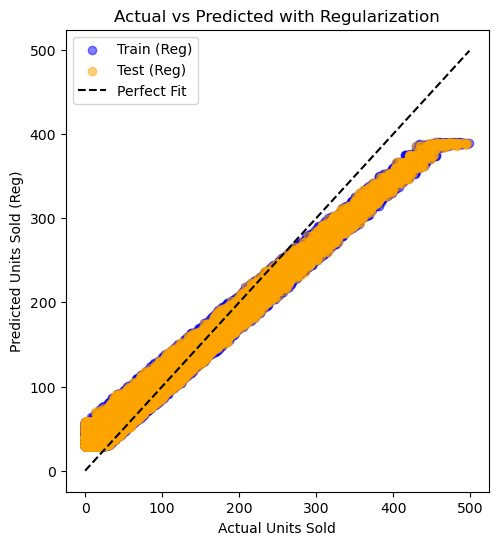

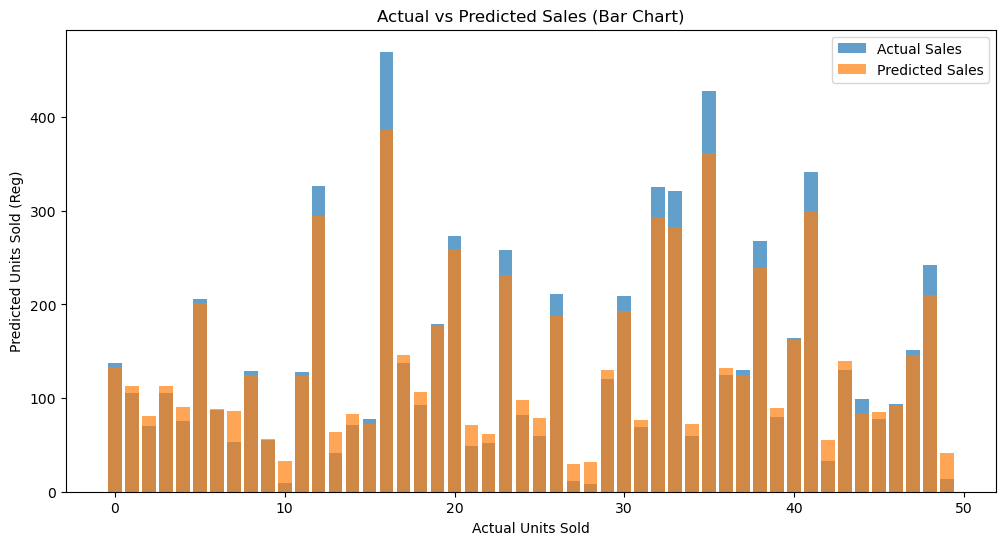

<Figure size 800x600 with 0 Axes>

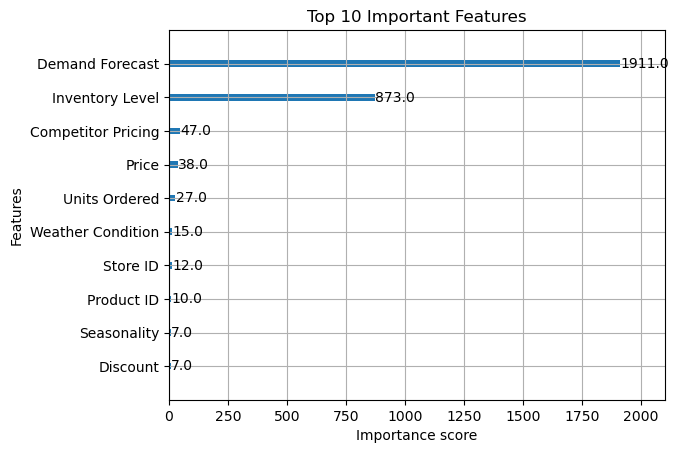

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Updated XGBoost Parameters (Adjusted for Generalization)
params_reg = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,                 # Lower learning rate
    'max_depth': 4,                        # Reduced tree depth
    'subsample': 0.8,                      # Lower sample usage
    'colsample_bytree': 0.8,               # Lower feature sampling
    'random_state': 42,
    'n_jobs': -1,
    'reg_lambda': 11,                      # Stronger L2 regularization
    'reg_alpha': 11,                       # Stronger L1 regularization
    'max_leaves': 20,                      # Cap leaf nodes
    'min_child_weight': 10,                # Require more weight per leaf
    'gamma': 0.5                           # Higher regularization on leaf split
}

# Cross-validation
cv_results = xgb.cv(
    params_reg,
    dtrain,
    num_boost_round=200,  # Balanced boosting rounds
    nfold=5,
    metrics='rmse',
    early_stopping_rounds=20,
    as_pandas=True,
    seed=42
)

# Best iteration and RMSE
best_iteration = cv_results['test-rmse-mean'].idxmin()
cv_rmse = cv_results.loc[best_iteration, 'test-rmse-mean']

# Train final model
xgb_model = xgb.train(params_reg, dtrain, num_boost_round=best_iteration)

# Predictions
y_train_pred = xgb_model.predict(dtrain)
y_test_pred = xgb_model.predict(dtest)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Display results
print("\n🔹 Model Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation RMSE: {cv_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Regularization Model - Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train (Reg)', color='blue')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test (Reg)', color='orange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', label='Perfect Fit')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold (Reg)')
plt.title('Actual vs Predicted with Regularization')
plt.legend()

# Plot Actual vs Predicted Sales using a Bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(y_test[:50])), y_test[:50], label='Actual Sales', alpha=0.7)
plt.bar(range(len(y_test_pred[:50])), y_test_pred[:50], label='Predicted Sales', alpha=0.7)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold (Reg)')
plt.title('Actual vs Predicted Sales (Bar Chart)')
plt.legend()
plt.show()

# Feature Importance Analysis
plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("Top 10 Important Features")
plt.show()